<a href="https://colab.research.google.com/github/duongnghiephuy/Practice-Simple-Deep-learning/blob/master/reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import reuters

Using TensorFlow backend.


In [3]:
(train_data,train_label),(test_data,test_label)=reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 1s 0us/step


The reuters dataset is already packed in Keras. It contains newires from Reuters labeled over 46 topics. This is a multi-label classification which similar to mnist.
The keyword num_words=10000 means we only import words that are 1000 most frequently used.

In [6]:
print("Shape of train data",train_data.shape)
print("Shape of test data",test_data.shape)
print("The encoded wire:\n",train_data[0])
d=reuters.get_word_index()
reverse={key:value for (value,key) in d.items() }
decoded=" ".join(reverse.get(i-3,"?") for i in train_data[0] )
print("The decoded wire is:\n",decoded)
print("The label is",train_label[0])

Shape of train data (8982,)
Shape of test data (2246,)
The encoded wire:
 [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
The decoded wire is:
 ? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
The label is 3


Each wire is encoded so we have to decode to see the original wire.

In [0]:
import numpy as np
from keras.utils import to_categorical
def vectorize_sequences(sequences,dimension=10000):
  results=np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence]=1
  return results

train=vectorize_sequences(train_data)
test=vectorize_sequences(test_data)

one_hot_train=to_categorical(train_label)
one_hot_test=to_categorical(test_label)






As the data is not in the form of proper 2D float tensor, we have to one-hot code the data. Only 10000 most common words are used so the 2D float tensor is of shape((len(data),10000)). Each transformed data point X then is a vector of 0 and 1 such that X[i]=1 if i appears in the original data point.



In [0]:
from keras import models
from keras import layers


The training set is cut into a partial training set and a validation set. The validation set is used as an indication of trained model's generalization power that we can try to improve.
The model structure is a linear stack of Denses layer.

- The output unit utilizes softmax function to output a 46D vector which indicates the probability of belonging to each class.

To improve accuracy:

- Tweak the layers' capacity(dimension of layers' output). A low capacity cannot capture predictive representations, resulting in underfitting.

In [0]:
network=models.Sequential()
network.add(layers.Dense(128,activation="relu",input_shape=(10000,)))
network.add(layers.Dense(46,activation="softmax"))

network.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])

train_val=train[:1000]
partial_train=train[1000:]
label_val=one_hot_train[:1000]
partial_label=one_hot_train[1000:]

print(partial_train.shape)
print(partial_label.shape)
history=network.fit(partial_train,partial_label,epochs=10,batch_size=256,validation_data=(train_val,label_val))



(7982, 10000)
(7982, 46)
Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 3s 427us/step - loss: 1.8104 - acc: 0.6511 - val_loss: 1.2016 - val_acc: 0.7340
Epoch 2/10
7982/7982 [==============================] - 3s 320us/step - loss: 0.8769 - acc: 0.8175 - val_loss: 0.9494 - val_acc: 0.8100
Epoch 3/10
7982/7982 [==============================] - 3s 326us/step - loss: 0.5822 - acc: 0.8836 - val_loss: 0.8712 - val_acc: 0.8170
Epoch 4/10
7982/7982 [==============================] - 3s 323us/step - loss: 0.4098 - acc: 0.9176 - val_loss: 0.8084 - val_acc: 0.8320
Epoch 5/10
7982/7982 [==============================] - 3s 323us/step - loss: 0.3013 - acc: 0.9357 - val_loss: 0.7899 - val_acc: 0.8290
Epoch 6/10
7982/7982 [==============================] - 3s 320us/step - loss: 0.2357 - acc: 0.9434 - val_loss: 0.8346 - val_acc: 0.8290
Epoch 7/10
7982/7982 [==============================] - 3s 325us/step - loss: 0.1922 - acc: 0.9493 - val_loss: 

We plot the loss and accuracy of this simple model.

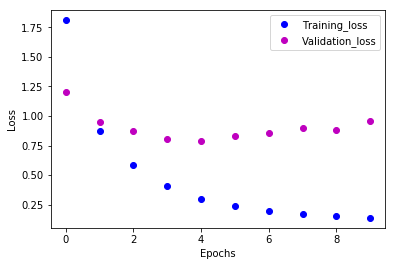

In [0]:
import matplotlib.pyplot as plt

his_dict=history.history

plt.plot(range(len(his_dict["loss"])),his_dict["loss"],"bo",label="Training_loss")
plt.plot(range(len(his_dict["loss"])),his_dict["val_loss"],"mo",label="Validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



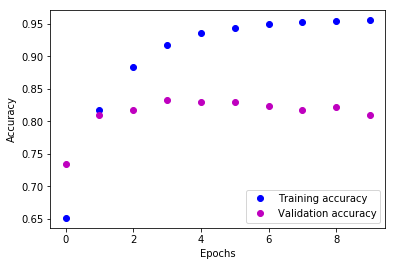

In [0]:
plt.figure()
plt.plot(range(len(his_dict["acc"])),his_dict["acc"],"bo",label="Training accuracy")
plt.plot(range(len(his_dict["acc"])),his_dict["val_acc"],"mo",label="Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

This model starts overfitting after 5 epochs so it is better to set epochs at 5.

In [0]:
network=models.Sequential()
network.add(layers.Dense(128,activation="relu",input_shape=(10000,)))
network.add(layers.Dense(46,activation="softmax"))

network.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])

network.fit(train,one_hot_train,epochs=5,batch_size=256)
print(network.evaluate(test,one_hot_test))

Epoch 1/5
8982/8982 [==============================] - 3s 387us/step - loss: 1.8022 - acc: 0.6627
Epoch 2/5
8982/8982 [==============================] - 2s 265us/step - loss: 0.8467 - acc: 0.8258
Epoch 3/5
8982/8982 [==============================] - 2s 261us/step - loss: 0.5667 - acc: 0.8864
Epoch 4/5
8982/8982 [==============================] - 2s 269us/step - loss: 0.4033 - acc: 0.9156
Epoch 5/5
2246/2246 [==============================] - 1s 291us/step
[0.8696022074029367, 0.8032056990735571]


The test evaluation is 80% for this simple model.